In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
# tensorflow 是一个完整的编程框架
greeting = tf.constant("Hello Google Tensorflow !")
sess = tf.Session()
result = sess.run(greeting)
print(result)
sess.close()

In [11]:
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2], [2]])
product = tf.matmul(matrix1, matrix2)
linear = tf.add(product, tf.constant(2))
with tf.Session() as sess:
    result = sess.run(linear)
    print(result)

In [28]:
# 进行肿瘤预测
from sklearn.model_selection import train_test_split
path = "F:/for learn/Python_ML_and_Kaggle/Datasets/Breast-Cancer/"
colnames = ["Sample code number", 
            "Clump Thickness", 
            "Uniformity of Cell Size", 
            "Uniformity of Cell Shape", 
            "Marginal Adhesion", 
            "Single Epithelial", 
            "Bare Nuclei", 
            "Bland Chromatin", 
            "Normal Nucleoli", 
            "Mitoses", 
            "Class"]
data = pd.read_csv(path + "breast-cancer-wisconsin.data", names=colnames)

In [127]:
x = np.float32(np.mat(data[["Clump Thickness", "Uniformity of Cell Size"]]))
y = np.float32(np.mat(data[["Class"]]))
# 替代了原有的标签｛2,4｝=>｛-1，+1｝
y = np.mat(list(map(lambda t: -1 if t==2 else 1, y))).reshape(-1, 1)
featureNum = x.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [141]:
# 线性模型的截距
b = tf.Variable(tf.zeros([1]))
#  线性模型的系数矩阵（向量）
W = tf.Variable(tf.random_uniform([featureNum, 1], -1, 1))
y = tf.matmul(x_train, W) + b
loss = tf.reduce_mean(tf.square(y - y_train))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for step in range(1000):
    sess.run(train)
    if step%200 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[ 0.4844211 ]
 [-0.44934753]] [-0.06566215]
200 [[ 0.05090662]
 [ 0.18555444]] [-0.99854571]
400 [[ 0.09392229]
 [ 0.1861534 ]] [-1.26733387]
600 [[ 0.10763254]
 [ 0.18634421]] [-1.3530035]
800 [[ 0.11200245]
 [ 0.18640502]] [-1.3803091]


In [142]:
W = sess.run(W)
b = sess.run(b)
test_negative = x_test[(y_test == -1).A1]
test_positive = x_test[(y_test == 1).A1]

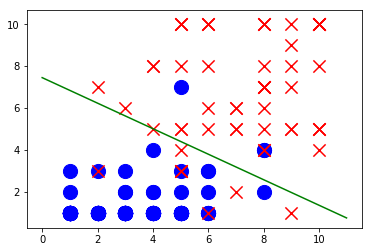

In [148]:
import matplotlib.pyplot as plt
# 直线方程 WX+b=0, w1x + w2y + b = 0
# y = (-b-w1x)/w2
lx = np.arange(0, 12)
ly = (-b - W[0]*lx)/W[1]
plt.scatter(test_negative[:, 0].A1, test_negative[:, 1].A1, marker="o", s=200, c="blue")
plt.scatter(test_positive[:, 0].A1, test_positive[:, 1].A1, marker="x", s=150, c="red")
plt.plot(lx, ly, "green")
plt.show()